# A primer into the "julia" language and the "jupyter" notebook

This handout is a PDF-PRINTED version of the first notebook and it is aimed at easing the work with the working with notebooks.

Before trying out to open the notebook from jupyter, it is advised to
1. install the packages below using the package installation mechanism in julia:
```julia
# press ']' and julia should switch to package mode
add Plotly,PyPlot,GR, 
# see the list below
```
1. you can start the IJulia - the jupyter notebook - using the command:
```julia
import IJulia; IJulia.notebook(dir=".")
```
1. at this point the interface will display a question: whether you want to install python/conda into a local environment. There are the cases:
    1. if you have a working ANACONDA environment in your system, then you should make the ``jupyter`` from that installation visible (in LINUX you can put in into the PATH environment, in windows also),
    1. if you want to install python into the local environment, then from within julia there will be a download of a MINICONDA environment and all packages will be installed again in the local folder.<br/>
    The two python installs might conflict, e.g. when installing a new package, one has to be careful __which__ ```pip/conda install``` is being called.
    
1. in your browser a jupyter console should appear and you can open the notebooks -- assuming you started the notebook from the directory.<br/>
   If your directory is not the one that stores your notebook __and__ data, you can change it __before__ using the __shell mode__ of the console press ";" and issue shell commands, or you can specify the directory in the parameter of the notebook function.



If you see this, then you installed julia from <a href="julialang.org">julialang.org</a>, you installed required packages - mind that _julia_ has a package system -, and you started the __notebook__ environment of the __IJulia__ package.

__Before start:__

- there is a list of packages that'll be likely needed when running the notebooks. It is advisable to install them in the command line mode (after installing julia and upon first start).
- to install - at the command prompt - you should enter into package mode by pressing ``]``, then issue the command ``add _pkg_name_``
- here you find a list of packages that are on my system:<br/>
  ``Plotly,PyPlot,PolygonOps,TiffImages,IJulia,PlotlyJS,JSON3,RDatasets``,<br/>
  ``Distributions,MLDataPattern,Plotly,GR,Colors,ImageView,DataFrames``,<br/>
  ``Plots,ImageMagick,Pluto,CSV,JLD,ImageFiltering,ColorTypes``,<br/>
  ``ImageMorphology,Statistics,Zygote,ImageIO,Flux,Images,Dates``,<br/>
  ``ImageSegmentation,DataSets,Makie,Conda``
- to learn julia, you could use the cheat-sheet from <br/>
  > __[MATLAB–Python–Julia cheatsheet](https://cheatsheets.quantecon.org/index.html)__
- to write __markdown__ in the notebook I use the <br/>
  > __[Markdown for Jupyter notebooks cheatsheet](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)__
  
The above list was obtained from the ``julia`` REPL using the command
```julia
[ pair.second.name 

    for pair in Pkg.dependencies() 
    if pair.second.is_direct_dep
]
```

 # The notebook series for the Numerical modelling course
 
 
 


# A "julia" notebook to start the work

This is an example notebook written in Julia that highlights the usage of JULIA within the JUPYTER notebook environment.

To start with, one can use the NOTEBOOK environment for quickly checking ideas.

This is done by entering repeatedly statements and - if proven wrong - correcting it to wite the code/algorithm that was aimed.

In a final form of the notebook one can make the notebook much nicer, e.g. by using the features offered by the MARKDOWN environment.

## Markdown

One can _set the type of cell_ either in the menu or using the keyboard:
- in the _Menu_ you set CELL and then CELL TYPE
- with the keyboard you _ESC_ape the typing mode and then press "M"
  (you can use "P" to go back to CODE)

## The present notebook is a markdown example

This first - header - is an example of this type of environment. It is written in Markdown and one can use several options to "prettify" the content:
 
1. one can use lists - using numbers to start a paragraph.

1. One can use LaTeX: $$\sigma(z)= \alpha$$ that is rendered as an equation.

## The aim of this notebook

We aim for:
1. starting to use the NOTEBOOK ENVIRONMENT
1. Introducing the JULIA language
1. Setting up VISUALISATION using the PLOTS environment.

# The Notebook

The Notebook is started from julia using:
```julia
import Pkg;
Pkg.add("IJulia")
# the above lines have to be done only once
import IJulia
IJulia.notebook(dir=".")
```

where: you first install IJulia, then you import is to be usable.

# The Julia language

It is a **FAST** competitor to the Python language. Similar in falvour, but it __has a TYPE system__. 

It has certain functional aspects to it, e.g. the iterators or the GENERATORS, please consult the Sherrington book.

In [1]:
import Plots

# the Plots package has a multitude of options. For small data-sets the plotly 
# (a javascript interface) is the better one, for larger data-sets the
#
# !__ GR __! interface is recommended.

# Plots.plotly() # used when small images are displayed or when curoius about details - angles, positions
Plots.gr()


Plots.GRBackend()

In [2]:
println("it works")

it works


## Visualisation

One of the first steps when "learning from Data" is its visualisation.

In the julia language this is done using the ```Plots``` package.
This package is well documented on the [juliaplots](http://juliaplots.org) web-page.

An explanation of the ```Plots``` environment is provided below. Please change to your style and then press CTRL-ENTER to re-render the plot.

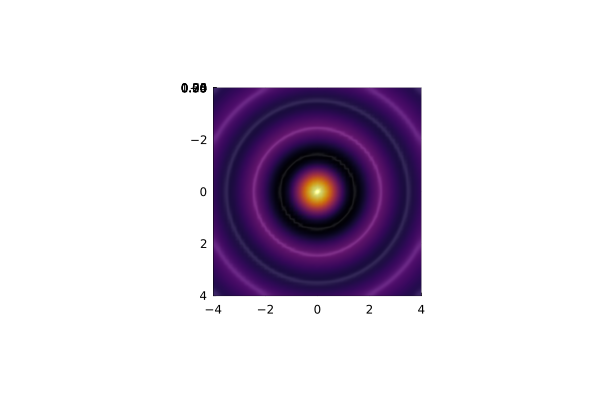

In [8]:
import LinearAlgebra # needed for the NORM function

# example plot

# first we declare the coordinates of the inputs
x = y = range(-4, stop = 4, length = 51) # there are 51 points in the interval [-4,4]

p = Plots.surface(     # the type of plot
    x, y,              # the x and y data points
    (x, y) -> sinc(LinearAlgebra.norm([x, y])),  # the function that is to be plotted.
    colorbar=false,    # various attributes to the plot
    camera=[90, 90]
)

In [6]:
# optionally one can save the image. Changing the extension will 
# automatically provide a different image type.

Plots.savefig("p.png")

# Note that the _extension_ of the file will provide the 
# type of the file

## Generating the data

One can use Julia to generate data.

Below is an example of
1. using the random generator ```randn``` to generate 10.000 four-dimensional data; and
1. using the distributions package to fit - with the Maximum Likelihood Estimator - a multivariate normal to the generated data.

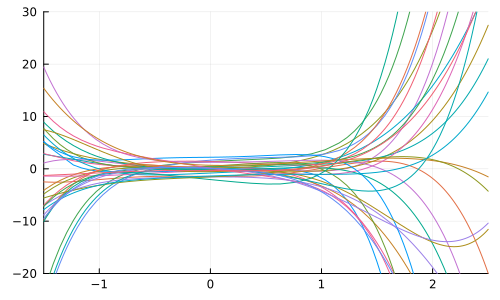

In [7]:
f_cinq(w0,w1,w2,w3,w4,w5) = x -> w0*1 + w1*x + w2*x.^2 + w3*x.^3+ w4*x.^4+ w5*x.^5

p = Plots.plot(xlim=(-1.5,2.5),ylim=(-20,30),legend=false,size=[500,300])
for _ in 1:30
    w0,w1,w2,w3,w4,w5 = randn(1,6)
    Plots.plot!(p,f_cinq(w0,w1,w2,w3,w4,w5))
end
p

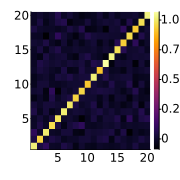

In [9]:
# the basic random generator is in Base
x_data = randn( (20,1000) );

# fitters are in Distributions
import Random
import Distributions

# THIS determines the MLE - most likely estimate - parameters of the
# _generating Gaussian
gen = Distributions.fit_mle(Distributions.MvNormal,x_data)

# if you want to show entities, than you can do this using the 
# @show gen.Σ, gen.μ
# command

# otherwise, one can use visualisation
Plots.heatmap(gen.Σ,size=(180,180))

In [10]:
# we are generating data.

# these are the generators
d1 = Distributions.MvNormal([10, 6],[1 0; 0 6] );
d2 = Distributions.MvNormal([5,  1],[6 0; 0. 1] );

n_samp = 500
# these are the samples
sample1 = rand(d1,n_samp);
sample2 = rand(d2,n_samp);

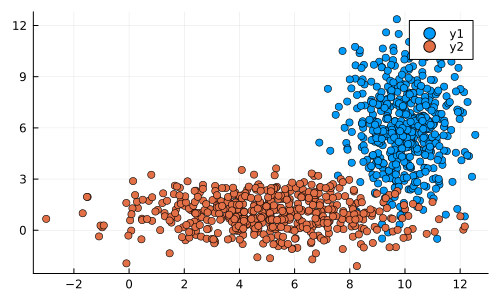

In [11]:
# Visualising the data

p = Plots.scatter(sample1[1,:],sample1[2,:],size=[500,300])
p = Plots.scatter!(p, sample2[1,:],sample2[2,:])

# You see two features - characteristics - of the Plots system:
# - you declare the options in either of the plots; it'll stay the same,
# - there are functions where you can be specific about the HANDLER of
#   the plot, the _convention_ is to have an '!' at the end of the function

In [12]:
typeof(p)

In [13]:
#
# for some reason I (Lehel Csato) could not plot an empty wireframe, 
# I wrote the code.
#

# defining wires_only

function wire_level!(p,x,y,z)
    # if z is scalar, then we extend it
    if ndims(z)<2 # extension operation
        z = z .* ones(length(x),length(y))
    end
    # grid in Y direction
    for (ii,x_a) in enumerate(x)
        p = Plots.plot!(p, 
            x_a .* ones(size(y)),
            y,
            z[ii,:],
            color=:gray,legend=false)
    end
    # grid in X direction
    for (jj,y_a) in enumerate(y)
        p = Plots.plot!(p, 
            x,
            y_a .* ones(size(x)),
            z[:,jj],
            color=:gray,legend=false)
    end
    p
end

wire_level! (generic function with 1 method)

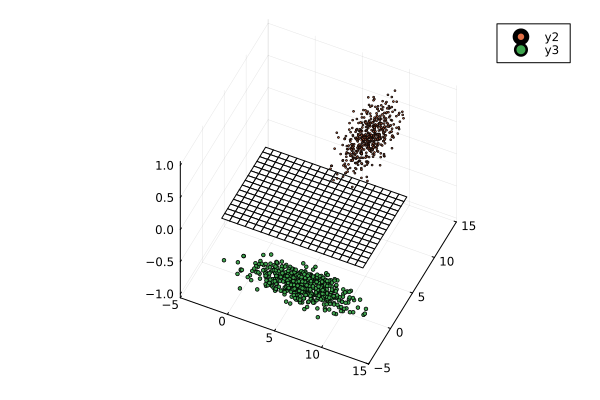

In [14]:
# x and y resolution 
x = range(-2, stop = 8, length = 16)
y = range(-2, stop = 13, length = 19)
all_ones = 1.0 .* ones(n_samp)

p = Plots.wireframe(y, x, (x, y) -> 0, fillalpha=0, colorbar=false,xlim=(-5,15),ylim=(-5,15))
p = Plots.plot!(p,sample1[1,:],sample1[2,:], all_ones, 
    seriestype=:scatter,
    markersize = 1
)
t_a =13
p = Plots.scatter3d!(p,sample2[1,:],sample2[2,:],-1 .* all_ones,
    camera=[25,10+3*t_a],
    markersize = 2
)

In [15]:
# x and y resolution 
x = range(-2, stop = 12, step = 1)
y = range(-2, stop = 12, step = 1)
all_z = zeros(n_samp)

p0 = Plots.plot3d(camera=[90,90],colorbar=false,legend=false)
p0 = Plots.scatter3d!(p0, sample2[1,:], sample2[2,:], all_z .- 1.,
    markercolor = :blue,
    markerstrokecolor = :blue,
    markersize = 4)
#p0 = Plots.wireframe!(p0,x,y,zeros((size(x,1),size(y,1))))
p0 = wire_level!(p0,x,y,zeros((size(x,1),size(y,1))))
p0 = Plots.scatter3d!(p0, sample1[1,:],sample1[2,:], all_z .+ 1,
    markersize = 4,
    markercolor = :green,
    markerstrokecolor = :green)

# this is an advanced feature of Julia - 
anim = Plots.@animate for ang =90:-1:30
    p = Plots.plot3d!(deepcopy(p0),
        camera=[30 + 2*ang/3. ,ang])
end
;
# below we save the animation we created
#Plots.gif(anim,"anim_test.gif", fps=5);


# below we PLAY the animation we created
#Plots.gif(anim, fps=5)

#p

┌ Info: Saved animation to 
│   fn = E:\University\Semester 1 Master\Mathematical Data Analysis\tmp.gif
└ @ Plots C:\Users\Dragos\.julia\packages\Plots\CUQan\src\animation.jl:139


Plots.AnimatedGif("E:\\University\\Semester 1 Master\\Mathematical Data Analysis\\tmp.gif")
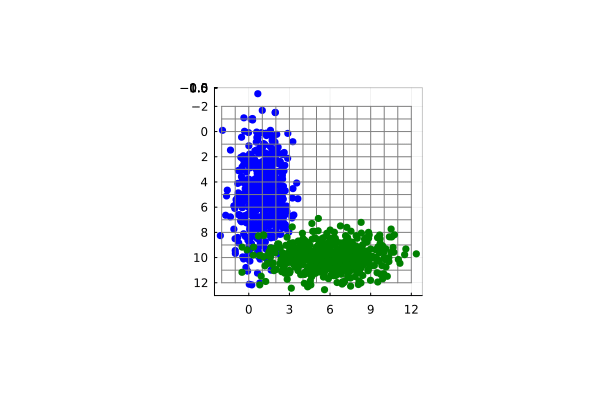

In [16]:
Plots.gif(anim,fps=5)

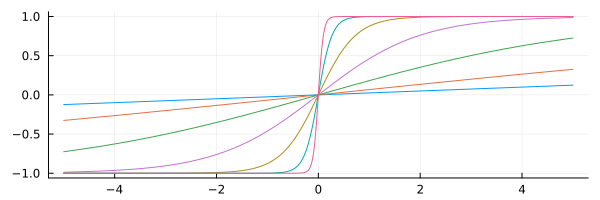

In [17]:
# defining the logistic function
sig(x; k=1) = 2 ./ (1 .+ exp.(-k .* x)) .- 1

# testing
Plots.plot([x->sig(x,k=k) for k in exp.(-3:3)],legend=false,size=(600,200))

# exp.() <- there is BROADCASTING

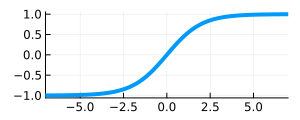

In [18]:
# plotting the standard sigmoid

Plots.plot(
    x->sig(x),
    xlims =(-7,7),
    legend=false,
    size=(300,120),
    width=4)

# observe that the "input" is not needed

# this plot is in the lectures
#Plots.savefig("sigmoid.pdf")

## Data input

We analyse data; for this we have first to read them into the system.

The most common toolset is the use of ```pandas```, a python-based routines that is used for data processing.
The pandas however has a lot of extra features that occludes the data modelling part of the lecture, therefore we will use CSV:

```julia
import CSV
```

If the data is coming in a MATRIX form and in a text file - as it is most often the case - then it is in a "comma-separated value" - or CSV - format.

We can use this type of data directly in julia, we can even enforce the data to be used as MATRIX - please not the data transformation.


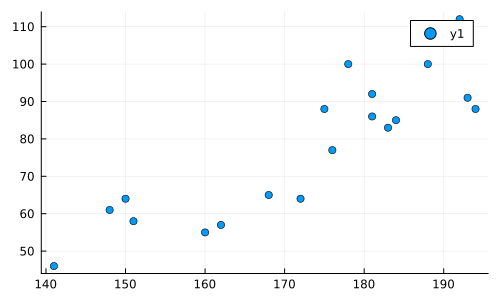

In [9]:
import CSV, DataFrames

# reading in the data.
train_data = Matrix(   # this is the enforcement of the type
    CSV.read("data/hw_data.csv", DataFrames.DataFrame,
        header = false         # one can use additional attributes for the reading function
    )
)

x_height = train_data[:,1];
y_weight = train_data[:,2];

# validating the reading operation
p = Plots.scatter(x_height,y_weight,size=[500,300],markersize=4)

## The experimenting at the end of the lecture

We first defined a function that has __two sets of parameters__, the input and the weights.

In [10]:
linear_malina(height,a) = a[2]*height + a[1]

linear_malina (generic function with 1 method)

We then proceeded to testing the julia + visualisatoin + parameter guessing - the results below already use the optimum values.

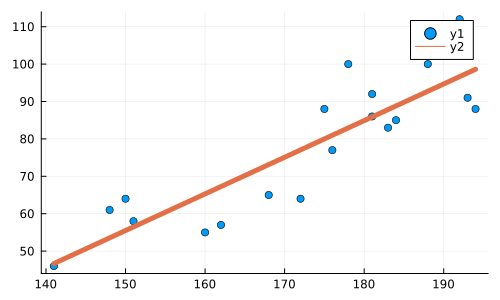

In [11]:
Plots.plot!(p,
    h -> linear_malina(h,[-91.5,.98]),
    width=5
)

Below is a one-liner that helps solving the MAXIMUM LIKELIHOOD solution assuming a linear model.

In [51]:
a = [ones(size(x_height)) x_height] \ y_weight

2-element Vector{Float64}:
 -91.54096846549652
   0.9799445837181675